In [ ]:
#import all required libries

##Basic and most important libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Classifiers
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score


#Data Processing Function

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
url = ('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')
df= pd.read_csv(url)

In [ ]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.shape

(50000, 8)

In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,50000,3597,26:00.0,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,50000.0,NaN,NaN,NaN,11.364171,9.685557,-5.0,6.0,8.5,12.5,200.0
date_time_of_pickup,50000,49555,2011-09-03 01:30:00 UTC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude_of_pickup,50000.0,NaN,NaN,NaN,-72.509756,10.39386,-75.423848,-73.992062,-73.98184,-73.967148,40.783472
latitude_of_pickup,50000.0,NaN,NaN,NaN,39.933759,6.224857,-74.006893,40.73488,40.752678,40.76736,401.083332
longitude_of_dropoff,50000.0,NaN,NaN,NaN,-72.504616,10.40757,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,NaN,NaN,NaN,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.41519
no_of_passenger,50000.0,NaN,NaN,NaN,1.66784,1.289195,0.0,1.0,1.0,2.0,6.0


In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
df.drop_duplicates(subset='unique_id', keep='first', inplace=True)

In [ ]:
df['unique_id'].shape

(3597,)

In [ ]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

<Axes: ylabel='Frequency'>

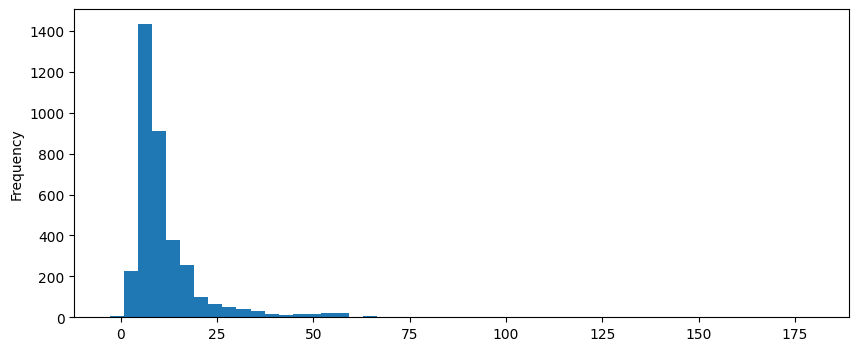

In [ ]:
df['amount'].plot.hist(bins=50,figsize=(10,4))

<Axes: ylabel='Density'>

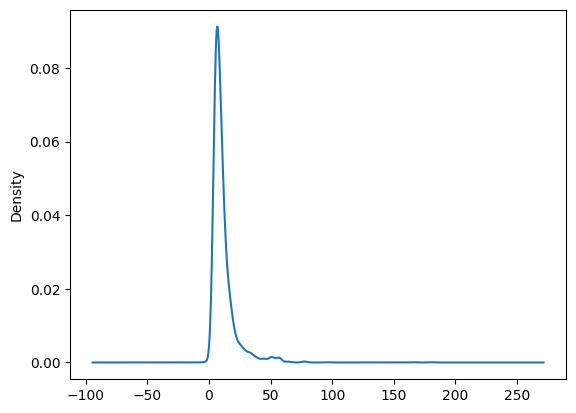

In [ ]:
df['amount'].plot.density()

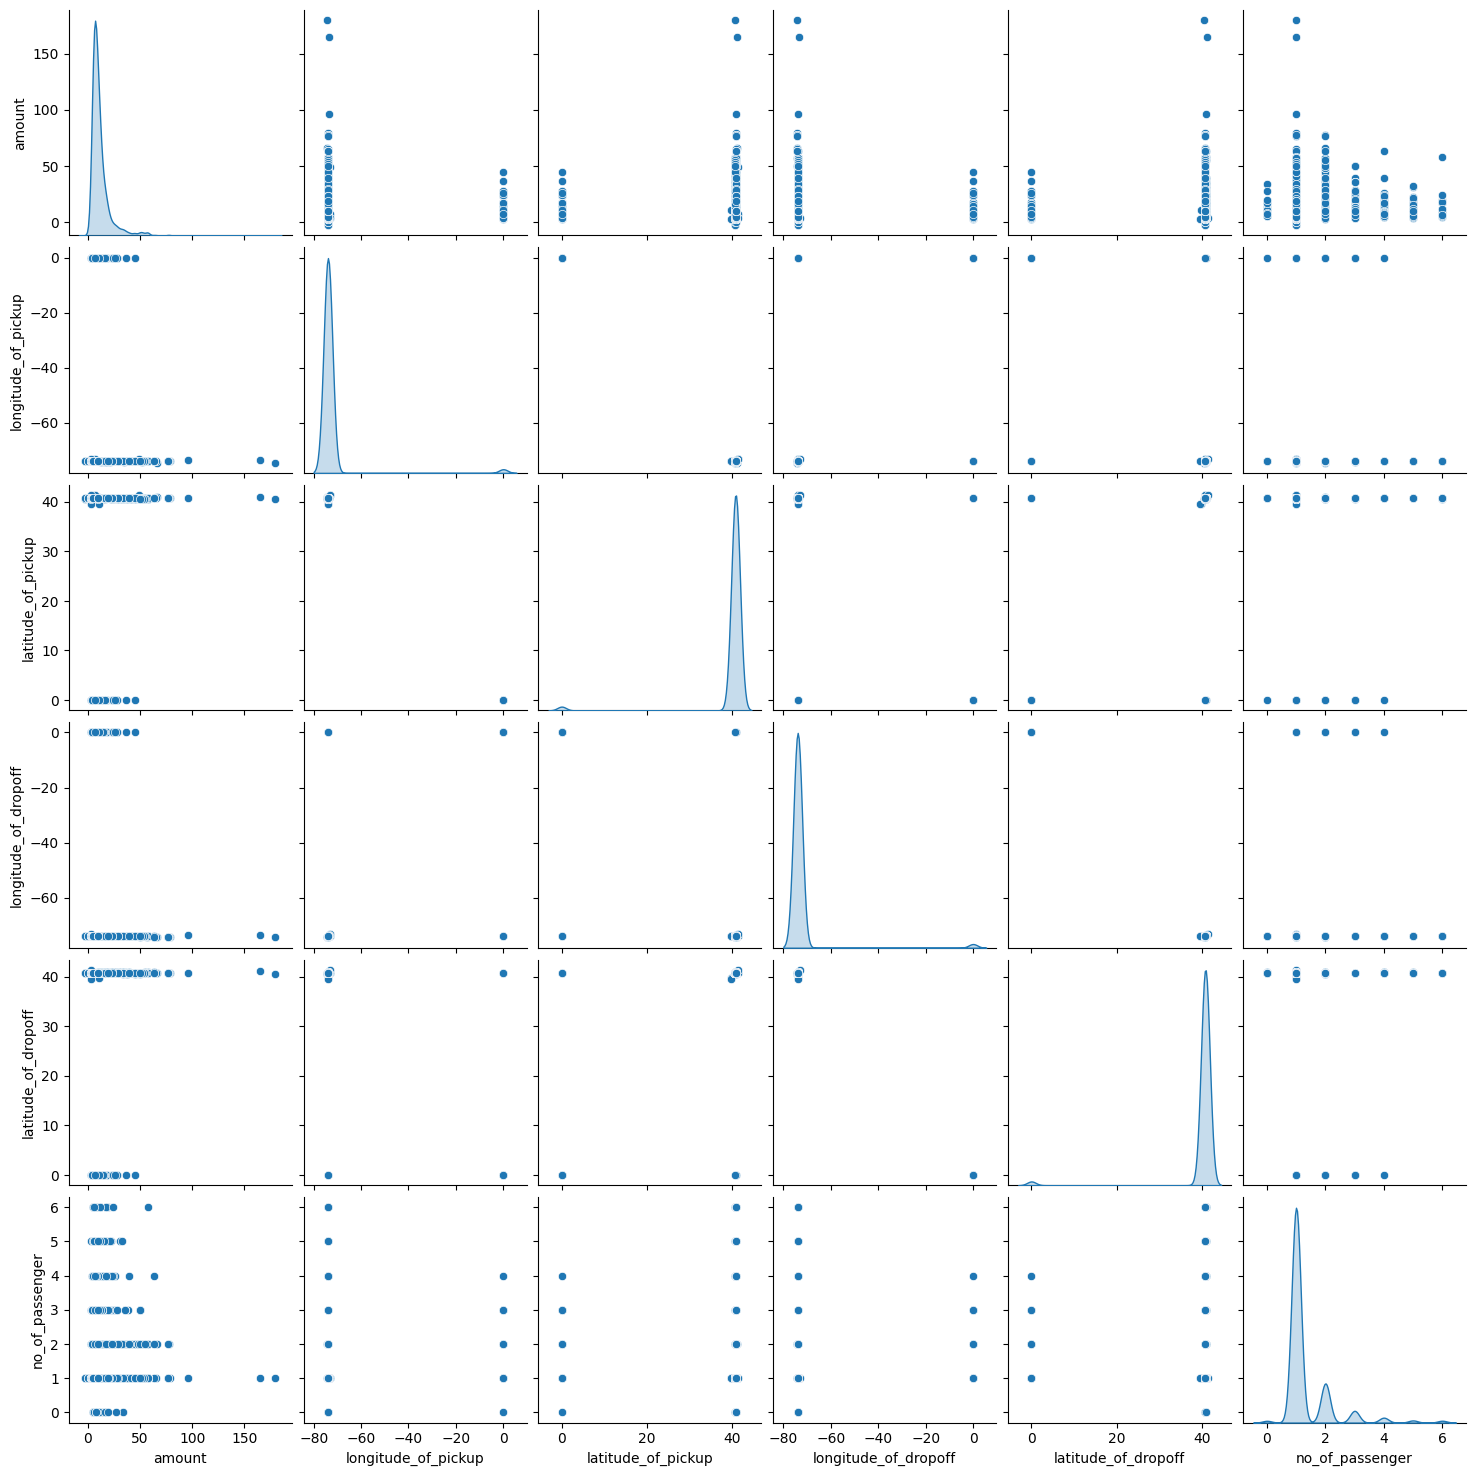

In [ ]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
corr=df.corr()
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005032,-0.004308,-0.000384,0.000357,0.029914
longitude_of_pickup,0.005032,1.000000,-0.999949,0.966635,-0.966585,-0.023099
latitude_of_pickup,-0.004308,-0.999949,1.000000,-0.966623,0.966631,0.022781
longitude_of_dropoff,-0.000384,0.966635,-0.966623,1.000000,-0.999953,-0.020386
latitude_of_dropoff,0.000357,-0.966585,0.966631,-0.999953,1.000000,0.020372
no_of_passenger,0.029914,-0.023099,0.022781,-0.020386,0.020372,1.000000


<Axes: >

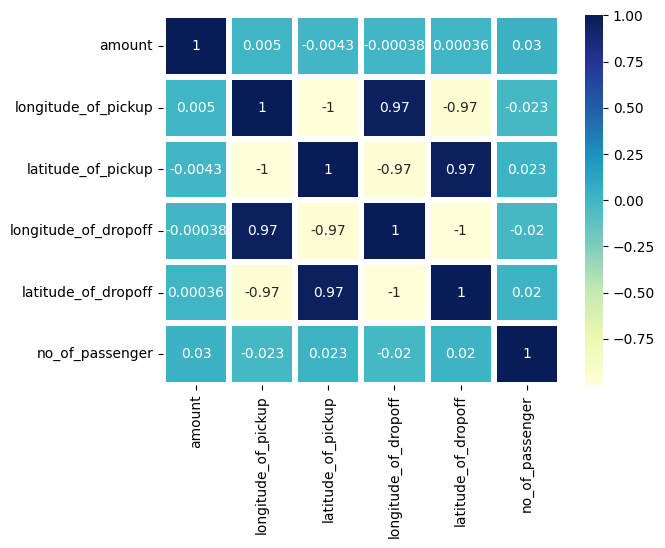

In [ ]:
sns.heatmap(corr,annot=True,linewidths=3,cmap='YlGnBu')

<Axes: xlabel='no_of_passenger', ylabel='amount'>

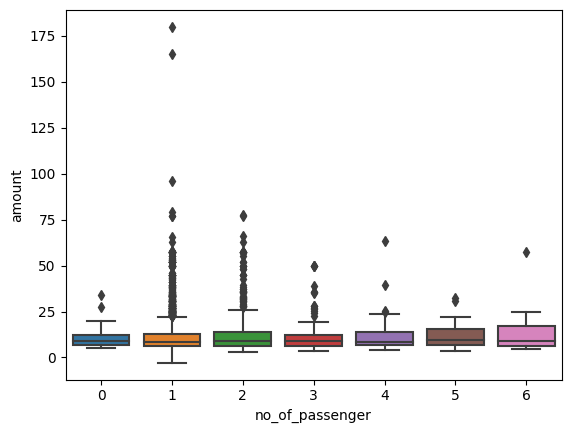

In [ ]:
sns.boxplot(x='no_of_passenger',y='amount',data=df)

In [ ]:
df['no_of_passenger'].value_counts()

1    2795
2     510
3     153
4      64
5      28
6      24
0      23
Name: no_of_passenger, dtype: int64

In [ ]:
median1 = df['no_of_passenger'].median()
median1

1.0

In [ ]:
df['no_of_passenger'].replace(0,median1,inplace=True)

In [ ]:
df['no_of_passenger'].value_counts()

1    2818
2     510
3     153
4      64
5      28
6      24
Name: no_of_passenger, dtype: int64

In [ ]:
df.drop('date_time_of_pickup',axis=1, inplace = True)

In [ ]:
df.drop('unique_id',axis=1, inplace = True)

In [ ]:
df['amount'].value_counts()

 6.50      169
 4.50      142
 8.50      128
 5.30       99
 5.70       98
 7.00       92
 8.00       91
 4.90       91
 6.90       88
 6.10       88
 10.50      87
 8.10       86
 5.00       84
 7.70       82
 6.00       82
 5.50       72
 7.30       71
 4.10       69
 7.50       66
 9.00       65
 12.50      63
 9.50       59
 11.00      54
 9.30       54
 11.50      54
 9.70       53
 8.90       52
 3.70       48
 10.10      47
 10.00      45
 10.90      44
 16.50      40
 11.30      37
 12.00      37
 14.50      35
 4.00       34
 12.90      32
 12.10      31
 11.70      31
 18.50      26
 13.00      26
 13.50      24
 15.50      23
 3.30       23
 16.10      23
 13.70      23
 14.00      22
 17.00      21
 3.50       20
 13.30      20
 16.00      19
 15.00      19
 14.10      18
 2.50       16
 19.00      14
 20.50      14
 57.33      14
 18.00      14
 16.90      13
 15.70      12
 17.50      12
 15.30      11
 21.50      11
 19.50      11
 14.90      11
 52.00      10
 18.10    

In [ ]:
df = df[df['amount']>= 0]

In [ ]:
df['longitude_of_pickup'].value_counts()

 0.000000     61
-73.990909     3
-73.967178     3
-73.137393     3
-73.988883     3
-73.994279     3
-73.975707     3
-73.990209     2
-73.972978     2
-73.992131     2
-73.976183     2
-73.980209     2
-73.976554     2
-73.885276     2
-73.982269     2
-73.991109     2
-73.984556     2
-73.983783     2
-73.994380     2
-73.873054     2
-73.991983     2
-73.991315     2
-73.982229     2
-74.005771     2
-73.981439     2
-73.870854     2
-73.986524     2
-74.006421     2
-73.998082     2
-73.985717     2
-73.975120     2
-73.977208     2
-73.956240     2
-74.004639     2
-73.976896     2
-73.984900     2
-73.989720     2
-73.974291     2
-73.982412     2
-73.970330     2
-74.006226     2
-73.990112     2
-73.982418     2
-73.988809     2
-74.005470     2
-73.978120     2
-73.993656     2
-73.979952     2
-73.977092     2
-73.990043     2
-73.990482     2
-73.978798     2
-73.995653     2
-74.007455     2
-73.992214     2
-73.980104     2
-73.978894     2
-73.978228     2
-74.005530    

In [ ]:
df['latitude_of_pickup'].value_counts()

0.000000     61
41.366138     3
40.754311     2
40.764536     2
40.758641     2
40.768200     2
40.748065     2
40.758476     2
40.736140     2
40.766498     2
40.764702     2
40.761300     2
40.758480     2
40.763005     2
40.739582     2
40.645324     2
40.783716     2
40.748950     2
40.764120     2
40.779197     2
40.765964     2
40.715565     2
40.768364     2
40.750142     2
40.784274     2
40.765440     2
40.753719     2
40.740751     2
40.748285     2
40.742719     2
40.755204     2
40.762394     2
40.772643     2
40.719024     2
40.758877     2
40.718803     2
40.733101     2
40.760058     2
40.732371     2
40.738821     2
40.771313     2
40.769132     2
40.725900     2
40.742165     2
40.748288     2
40.775009     2
40.761807     2
40.752603     2
40.773760     2
40.760160     2
40.738510     2
40.742012     2
40.738625     2
40.761844     2
40.719869     2
40.759881     2
40.740880     2
40.763180     2
40.768633     2
40.753650     2
40.781000     2
40.742155     2
40.73720

In [ ]:
df = df[(df['longitude_of_pickup'] != 0.0) & (df['latitude_of_pickup'] != 0.0)]

In [ ]:
df.sample

<bound method NDFrame.sample of        amount  longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
0        4.50           -73.844311           40.721319            -73.841610   
1       16.90           -74.016048           40.711303            -73.979268   
2        5.70           -73.982738           40.761270            -73.991242   
3        7.70           -73.987130           40.733143            -73.991567   
4        5.30           -73.968095           40.768008            -73.956655   
5       12.10           -74.000964           40.731630            -73.972892   
7       16.50           -73.951300           40.774138            -73.990095   
8        9.00           -74.006462           40.726713            -73.993078   
9        8.90           -73.980658           40.733873            -73.991540   
10       5.30           -73.996335           40.737142            -73.980721   
12       4.10           -73.991601           40.744712            -73.983081   
13      

In [ ]:
print(df.dtypes)

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object


In [ ]:
df.sample()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
7398,2.5,-73.96425,40.756312,-73.964035,40.756664,1


In [ ]:
#df=pd.get_dummies(df,columns=['no_of_passenger'])

Text(0.5, 1.0, 'Correlation Heatmap')

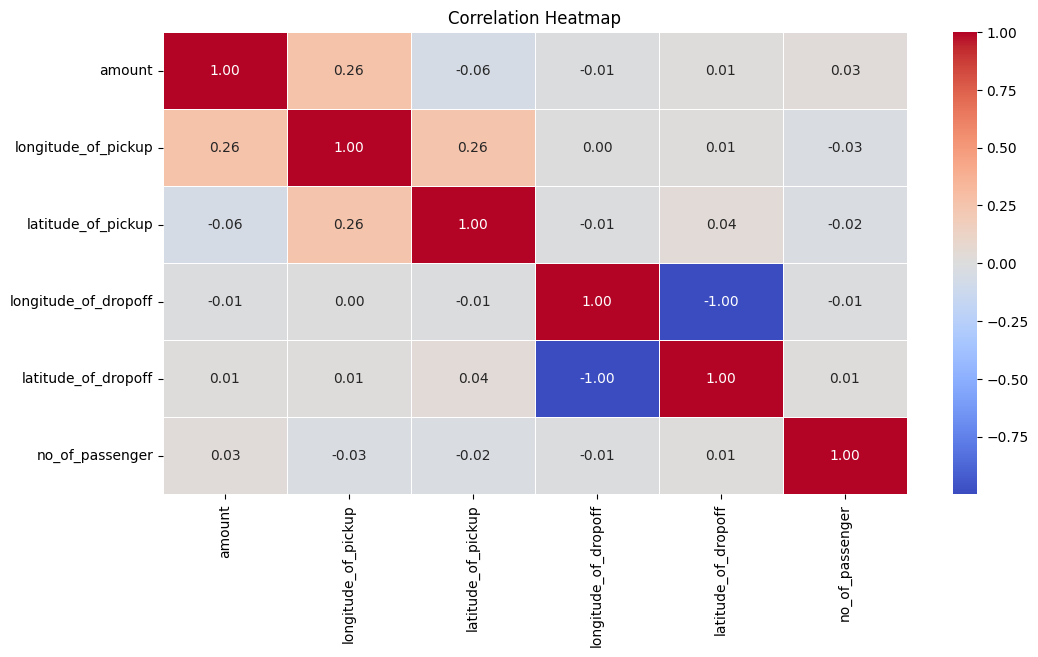

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')


In [ ]:

y = df['amount']
X= df.drop(['amount'],axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear = linear_reg_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('\nLinear Regression Results:')
print(f'Mean Squared Error: {mse_linear}')
print(f'R^2 Score: {r2_linear}')


Linear Regression Results:
Mean Squared Error: 92.03188963222385
R^2 Score: 0.09657937135449113


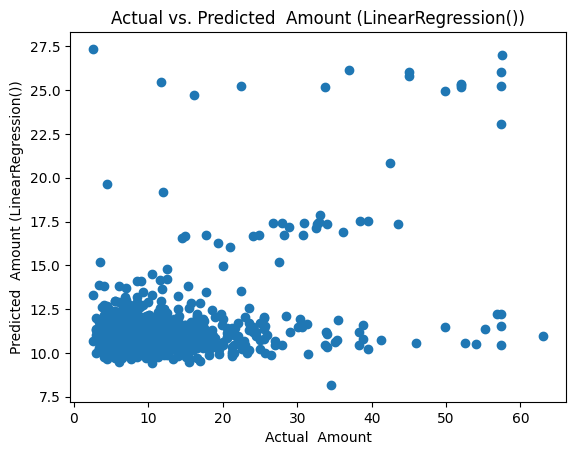

In [ ]:
 # Visualize actual vs. predicted values
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual  Amount')
plt.ylabel(f'Predicted  Amount ({linear_reg_model})')
plt.title(f'Actual vs. Predicted  Amount ({linear_reg_model})')
plt.show()


In [ ]:
# Bagging Regression
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print('\nBagging Regression Results:')
print(f'Mean Squared Error: {mse_bagging}')
print(f'R^2 Score: {r2_bagging}')


Bagging Regression Results:
Mean Squared Error: 15.278414793590951
R^2 Score: 0.8120920061107093


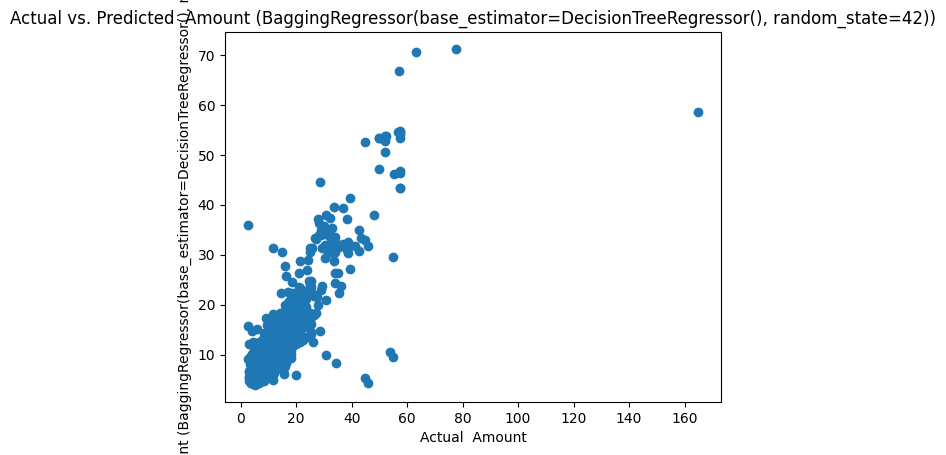

In [ ]:
# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred_bagging)
plt.xlabel('Actual  Amount')
plt.ylabel(f'Predicted  Amount ({bagging_model})')
plt.title(f'Actual vs. Predicted  Amount ({bagging_model})')
plt.show()

In [ ]:
# AdaBoost Regression
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

print('\nAdaBoost Regression Results:')
print(f'Mean Squared Error: {mse_adaboost}')
print(f'R^2 Score: {r2_adaboost}')



AdaBoost Regression Results:
Mean Squared Error: 22.092808981612446
R^2 Score: 0.783128441038496


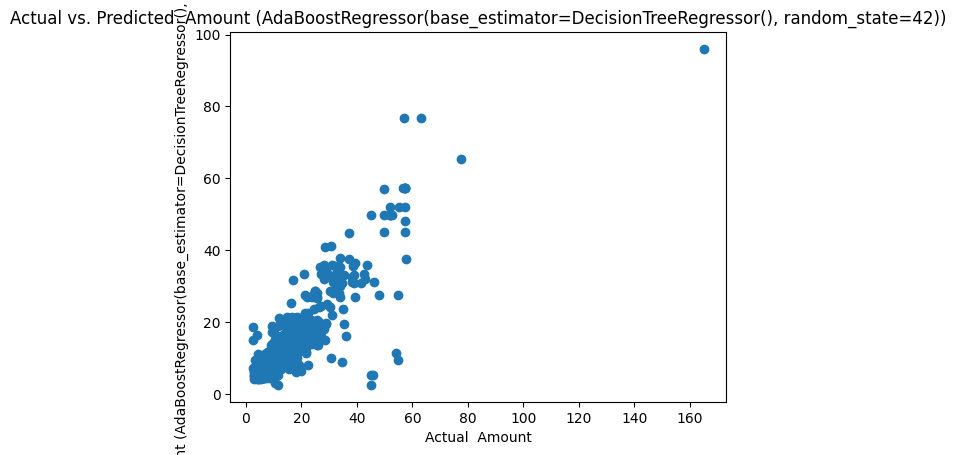

In [ ]:
# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred_adaboost)
plt.xlabel('Actual  Amount')
plt.ylabel(f'Predicted  Amount ({adaboost_model})')
plt.title(f'Actual vs. Predicted  Amount ({adaboost_model})')
plt.show()


In [ ]:
# Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\nRandom Forest Regression Results:')
print(f'Mean Squared Error: {mse_rf}')
print(f'R^2 Score: {r2_rf}')



Random Forest Regression Results:
Mean Squared Error: 22.881983033352192
R^2 Score: 0.7753816032762536


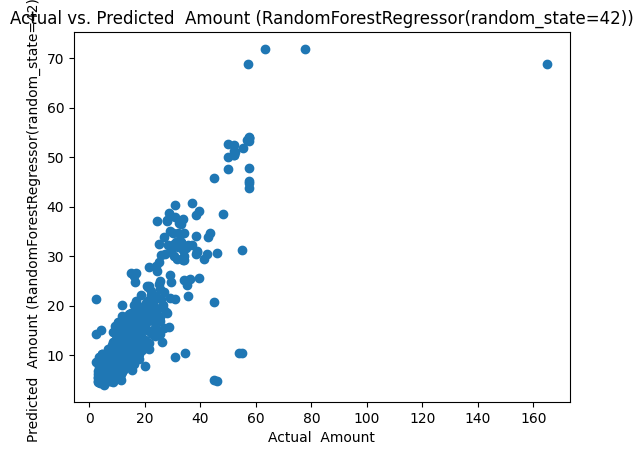

In [ ]:
# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual  Amount')
plt.ylabel(f'Predicted  Amount ({random_forest_model})')
plt.title(f'Actual vs. Predicted  Amount ({random_forest_model})')
plt.show()

In [ ]:
# Gradient Boosting Regression
gradient_boost_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boost_model.fit(X_train, y_train)
y_pred_gb = gradient_boost_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print('\nGradient Boosting Regression Results:')
print(f'Mean Squared Error: {mse_gb}')
print(f'R^2 Score: {r2_gb}')


Gradient Boosting Regression Results:
Mean Squared Error: 27.973074689630522
R^2 Score: 0.7254054782288716


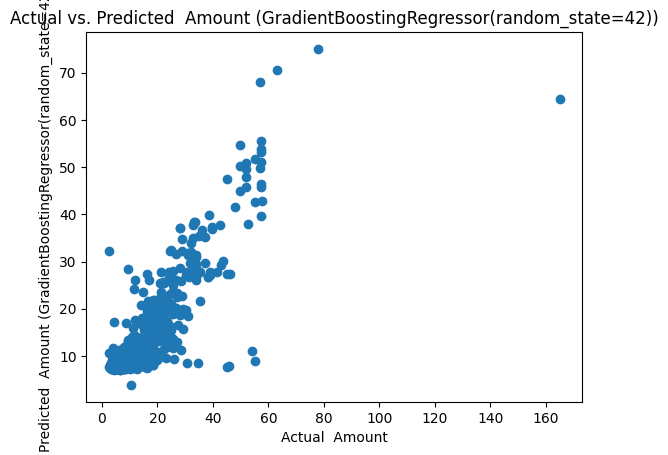

In [ ]:
# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Actual  Amount')
plt.ylabel(f'Predicted  Amount ({gradient_boost_model})')
plt.title(f'Actual vs. Predicted  Amount ({gradient_boost_model})')
plt.show()